# Kaggle Face Mask Types Dataset

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import pathlib
import splitfolders

import PIL
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

### Data Load

In [13]:
data_dir = "FaceMask_Types_Dataset/Dataset"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('FaceMask_Types_Dataset/Dataset')

In [5]:
total_img = glob.glob("Dataset/train/*/*")

print(f"Total Images: {len(total_img)}")

Total Images: 1956


In [8]:
total_img = pd.Series(total_img)
total_df = pd.DataFrame()
total_df["Filename"] = total_img.map(lambda img_name: img_name.split("\\")[-1])
total_df["ClassId"] = total_img.map(lambda img_name: img_name.split("\\")[-2])

total_df.head()

,Filename,ClassId
0,0.jpg,cloth
1,1.jpg,cloth
2,10.jpg,cloth
3,100.jpg,cloth
4,101.jpg,cloth


In [9]:
class_id_distributionTotal = total_df["ClassId"].value_counts()
class_id_distributionTotal

nfm      474
cloth    396
n95v     390
n95      354
srg      342
Name: ClassId, dtype: int64

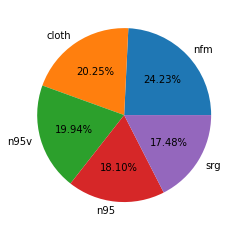

In [10]:
plt.figure(facecolor="white")
_ = plt.pie(class_id_distributionTotal.values, labels=class_id_distributionTotal.index, autopct="%.2f%%")

### Data Split

In [12]:
data_dir

WindowsPath('FaceMask Types Dataset/Dataset')

In [14]:
# Train : Test : Val = 80 : 10 : 10
splitfolders.ratio(data_dir, output="output", ratio=(0.8, 0.1, 0.1))

ValueError: The provided input folder "FaceMask_Types_Dataset\Dataset" does not exists. Your relative path cannot be found from the current working directory "c:\Users\spec3\OneDrive\바탕 화면\dev\struggles\Face Mask Types Dataset".